# STAT207 Final Project - Predicting the Play: A Machine Learning Approach to Identifying Multiplayer Features in Video Games


Victoria C, Sophia B, Josh A, Charles A

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Introduction

The primary research goal for this project  is to build a predictive model that will effectively predict if a game has a multiplayer mode for new datasets. 

The secondary research goal for this project is to see which model will yield the most reliable, interpretative insights about the nature of the relationship between the variables in the dataset.

Our final project aims to analyze the video games dataset that was provided to us by Dr.Ellison. We have chosen to look at 5 explanatory variables: ‘review score’, ‘sales’, ‘price’, ‘console’, and ‘rating’ with the response variable ‘multiplayer’. This research question would be useful to those (either competitive e-sport players or casual players) who are interested in purchasing new video games that have a multiplayer option. Since video games are not cheap activities, one may be motivated to make a well thought out decision on what game to buy. According to Statista, in 2022, “the average price for a video game sold in the United States at the year of release was $69.99” (Clement, 2023), this price not taking into consideration the console itself, which goes for hundreds of dollars alone. If one's motivation is to find a video game that provides entertainment for multiple people, this research would help them figure out what games to buy to get the most use out of their purchase. 

Other than price, multiplayer video games have risen in popularity in the past couple years due to “the ability to socialize and self-express in the digital environment” (Severin). With the help of the internet, people have become more interconnected than before. This is beneficial to society, since human interaction is crucial for man kind to prevent developing psychological disorders, like depression. Additionally, companies have also prioritized producing more multiplayer games since “multiplayer gamers spend more time and money on games than single player preferring gamers” (Severin, 2022). With the majority of young gamers being teen boys, the video game industry focuses more on the wants and needs of that specific consumer base. According to a 2022 MIDiA Consumer Research survey, it has been reported that on average, “the younger the gamer, the more likely they prefer multiplayer” mode. The results show that in the 16-19 age bracket, 35% prefer multiplayer games, compared to the 55+ age bracket, only 9% prefer multiplayer games (Severin, 2022). In general, teens have more time to play video games since they do not have the responsibilities of going to work or raising a family; coming from a capitalistic society, it makes sense for companies to prioritize making games that fit their main customer demand criteria, since they are the ones playing the most.

This individual would be interested in obtaining a high probability for a classifier of 0 (false - not multiplayer). If the model focused more on classifying 1 (true- multiplayer), there is a chance that the model could classify a non-multiplayer game as a multiplayer game (false positive). This would be detrimental to someone who would be interested in this research, since they are specifically looking for only multiplayer games; once again, since games are expensive, if one prioritizes getting a multiplayer game, and on accident this model would give them a false positive, the customer would get upset having to deal with returns, or possibly not even being able to return a game if used or opened. Ensuring a high probability of classifying true negatives (classifier of 0) would help this individual more; even if a multiplayer game was classified as a 0 (false negative), at least it gives this person more confidence that all the games that are truly multiplayer are ACTUALLY multiplayer. It’s safer to misclassify some multiplayer games as non-multiplayer games than misclassifying non-multiplayer games as multiplayer games. However, if possible, it would be ideal for the model to equally have high accuracy for both "positives" and "negatives" since misclassifying a multiplayer game as a non-multiplayer game decreases the sample size of multiplayer video games, so the individual has less options to choose from.


## 2. Dataset Discussion

We obtained this dataset from the mini-project guide from Dr. Ellison, who downloaded it on September 8th, 2023. It has 1,212 entries at the moment, before cleaning. This data was originally collected by Dr. Joe Cox, for games between 2004 and 2010, tracking for multiple stats; specifically for this project, we focused on the variables: Metrics.Review Score, Metrics.Sales, Metrics.UsedPrice, Release.Console, Release.Rating, and Features.MaxPlayers. From a quick glance, this dataset seems to have a diverse set of observations (for our specific columns) needed for this research question. The Max Players variable ranges from 1-8, there is a variety of video games Ratings from E for Everyone to M for Mature, the Review Scores values range between 0-100 (no extrapolation), and the Price and Sales variables are within a reasonable range, and there are many popular consoles taken into consideration (many consoles which people purchase since they are so popular). Taking that into consideration, the person that is interested in this research motivation will have a large variety of video games to choose from, depending on what their specific criteria is since this data set has a large variety of different observations.  

The five explanatory variables we selected are Review Score, Used Price, Rating, Console, and Sales.

“Review Score” contains ratings of games from 1-100 for quality (not determined by Dr. Cox).

“Sales” is the overall sales for the game in millions of dollars (USD). 

“Rating” is either “E”, “M”, or “T” based on the maturity rating of the game.

“Console” is the company that produced it, for example Xbox or Sony.

“Used Price” is what the game is selling for on the secondary market either on eBay or brick-and-mortar stores like Gamestop. 

We believe that these five will give us the best predictions on whether there’s a relationship between Multiplayer (our response variable) and our explanatory variables. Looking at Review Scores and commentary can help someone get insight from others if they liked the game or not (and find out if it was multiplayer or not), the Sales of a videogame can help indicate if more people purchase the game (based on our research we see that more younger people like to play multiplayer games, so perhaps the more sales of a video game can indicate it is multiplayer), the Rating of the video can help customers choose which type of multiplayer video game they want to buy (either for a child, teen or adult), Console can help a customer decide if that multiplayer game they want to buy is available for their console (since not every video game is available for each console), and Used Price can help determine if one is able to afford a multiplayer game or not. 

In [2]:
df = pd.read_csv("video_games.csv")
df.head()

,Title,Features.Handheld?,Features.Max Players,Features.Multiplatform?,Features.Online?,Metadata.Genres,Metadata.Licensed?,Metadata.Publishers,Metadata.Sequel?,Metrics.Review Score,...,Length.Main + Extras.Average,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,...,24.916667,29.966667,25.000000,16,18.333333,14.333333,18.316667,14.500000,21,9.700000
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,...,9.750000,9.866667,9.750000,2,9.616667,10.333333,11.083333,10.000000,3,9.583333
2,WarioWare Touched!,True,2,True,True,"Action,Racing / Driving,Sports",True,Nintendo,True,81,...,3.850000,5.666667,3.333333,11,2.783333,1.916667,2.933333,1.833333,30,1.433333
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,...,12.766667,17.316667,12.500000,12,10.483333,8.350000,11.083333,8.000000,23,5.333333


In [3]:
df.shape[0]

1212

## 3. Dataset Cleaning

**Explicit Data Cleaning**

We first decided to subset the original dataset to only contain the explanatory and reponse variables we meant to use to answer our research question. 

In [4]:
df = df[["Metrics.Review Score", "Metrics.Sales", "Metrics.Used Price", "Release.Console", "Release.Rating", "Features.Max Players"]]
df.head()

,Metrics.Review Score,Metrics.Sales,Metrics.Used Price,Release.Console,Release.Rating,Features.Max Players
0,85,4.69,24.95,Nintendo DS,E,1
1,89,0.56,14.95,Sony PSP,E,1
2,81,0.54,22.95,Nintendo DS,E,2
3,81,0.49,12.95,Sony PSP,E,1
4,61,0.45,14.95,Nintendo DS,E,1


To make our dataset more comprehensible, we changed the names of the columns to simpler titles. We did by creating a new column (with a simpler title) and inputting all the values from the column that had a messy name. After doing so, we deleted the column with the messy title with the using parameters axis = 1 so we dont have duplicate data. We did this for each variable we were looking at. 

In part 4, we turn the Features Player column into bianary categorical response variable (turn into True 1 and False 0 values).

In [5]:
df["Metrics_Price"] = df["Metrics.Used Price"]
df = df.drop("Metrics.Used Price", axis = 1)

In [6]:
df["Metrics_Sales"] = df["Metrics.Sales"]
df = df.drop("Metrics.Sales", axis = 1)

In [7]:
df["Metrics_Score"] = df["Metrics.Review Score"]
df = df.drop("Metrics.Review Score", axis = 1)

In [8]:
df["Release_Console"] = df["Release.Console"]
df = df.drop("Release.Console", axis = 1)

In [9]:
df["Release_Rating"] = df["Release.Rating"]
df = df.drop("Release.Rating", axis = 1)

In [10]:
df['Features_Players'] = df['Features.Max Players']
df= df.drop('Features.Max Players', axis =1)

In [11]:
df = df.dropna()
df.shape[0]

1212

There are no explicit missing variables since we still have the same amount of rows as before. 

**Implicit Data Cleaning**

We checked for implicit missing variables by using the .dtypes function. Since all the dtypes match their variables, we have no implicit missing variables. 

The pros for using the dtypes function for implicit cleaning as it is simple and brief. Because we only had 6 variables, we quickly got to see if the variables types match with their string or not. Because they matched, we did not have to continue; if they did not match, we would then have to dive deeper into the columns to search for the unique missing value. The cons of using dtypes is that because it is so simple, it is vague; it is possible that the specific strings match the variable type, but the observation can still be wrong (like extrapolation). 

In [12]:
df.dtypes

Metrics_Price       float64
Metrics_Sales       float64
Metrics_Score         int64
Release_Console      object
Release_Rating       object
Features_Players      int64
dtype: object

**Outlier Cleaning**

1205

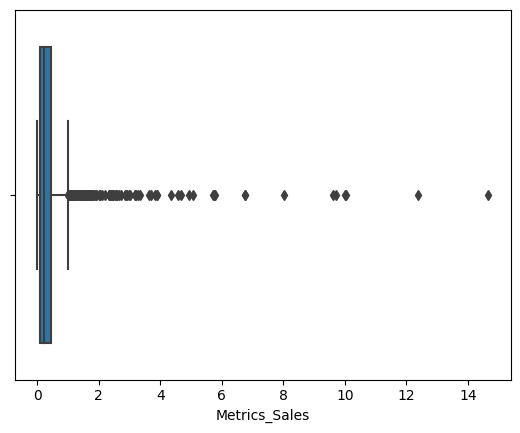

In [13]:
sns.boxplot(x = "Metrics_Sales", data = df)
(df[df["Metrics_Sales"]> 8])
df = df.drop(index = [22,23,156,157,419,420,833])
df.shape[0]


1202

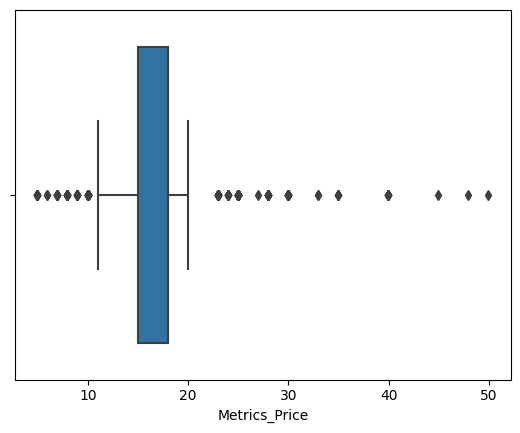

In [14]:
sns.boxplot(x = "Metrics_Price", data = df)
df[df["Metrics_Price"]>40]
df = df.drop(index = [427,730,1106])
df.shape[0]


<Axes: xlabel='Metrics_Score'>

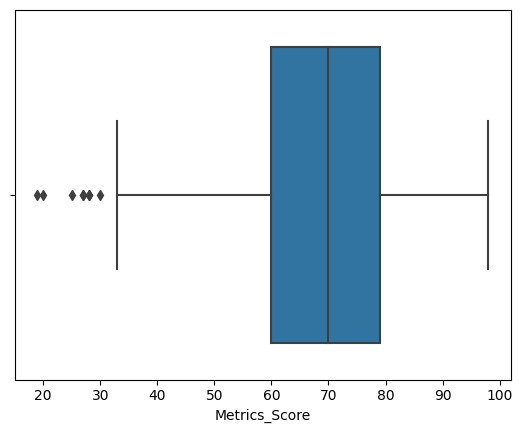

In [15]:
sns.boxplot(x = "Metrics_Score", data = df)


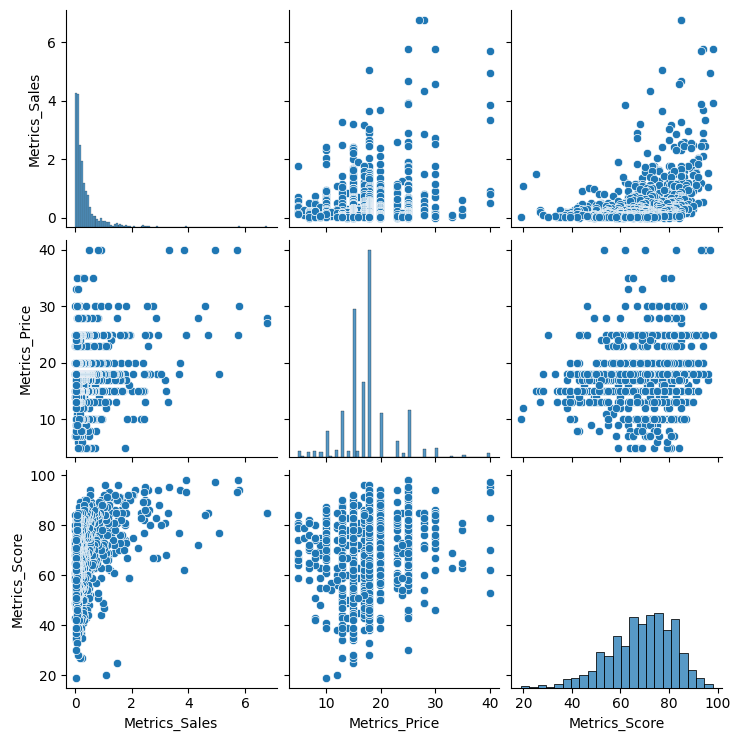

In [16]:
sns.pairplot(df[["Metrics_Sales", "Metrics_Price", "Metrics_Score"]])


Our group dropped 10 rows due to outliers and zero for all other data cleaning reasons. After creating boxplots of the three numerical variables that can have outliers, we only dropped outliers in Price and Sales boxplots since we felt some points too far from the rest of the dataset that it could affect the mean or other analysis in problematic ways. Pros in dropping these outliers would be that our statistic calculations like mean would not be skewed; cons in dropping these outliers would be that our final calculations are not representative of the entire dataset population. We decided not to cut out any outliers from the Scores Rating boxplot since getting rid of some low scored games would affect our end results. It is possible that some low rated games are still multiplayer games, so to maximize the sample size of multiplayer games, we decided to keep all scores in the model. These scores did not fall into extrapolation too, so these scores were valid. We also decided not to cut any points after creating a pairplot. 

## 4. Preliminary Analysis

To facilitate our analysis in predicting the multiplayer feature of video games, we transformed the 'Features.Max Players' column into a binary variable named 'multiplayer'. In this conversion, games with a maximum player count of 1 (single-player games) were assigned a value of 0, and those with a player count greater than 1 (indicating multiplayer capabilities) were assigned a value of 1. This binary representation allows us to utilize logistic regression for our predictive modeling.

We conducted a series of visual analyses to understand the relationship between the newly defined 'multiplayer' variable and each of the explanatory variables: 'review score', 'sales', 'price', 'console', and 'rating'. For numerical variables ('review score', 'sales', 'price'), box plots were utilized to observe their distribution across the multiplayer categories. For categorical variables ('console', 'rating'), bar plots were employed to assess the proportion of multiplayer games across different categories. These visualizations are pivotal in identifying which variables might have a significant influence on a game's multiplayer status.

To further our analysis, we explored the associations between pairs of explanatory variables. This step is crucial to identify any potential multicollinearity or strong correlations that might exist between these variables. For numerical variable pairs, scatter plots can be used to visualize these relationships. In contrast, for categorical variables or mixed pairs (one categorical and one numerical), grouped bar plots or similar visualizations are suitable. These insights can help in understanding the interdependencies between variables and refining our predictive model.

In [17]:
df["multiplayer"] = (df["Features_Players"] > 1).astype(int)

df[['Features_Players', 'multiplayer']].head()


,Features_Players,multiplayer
0,1,0
1,1,0
2,2,1
3,1,0
4,1,0


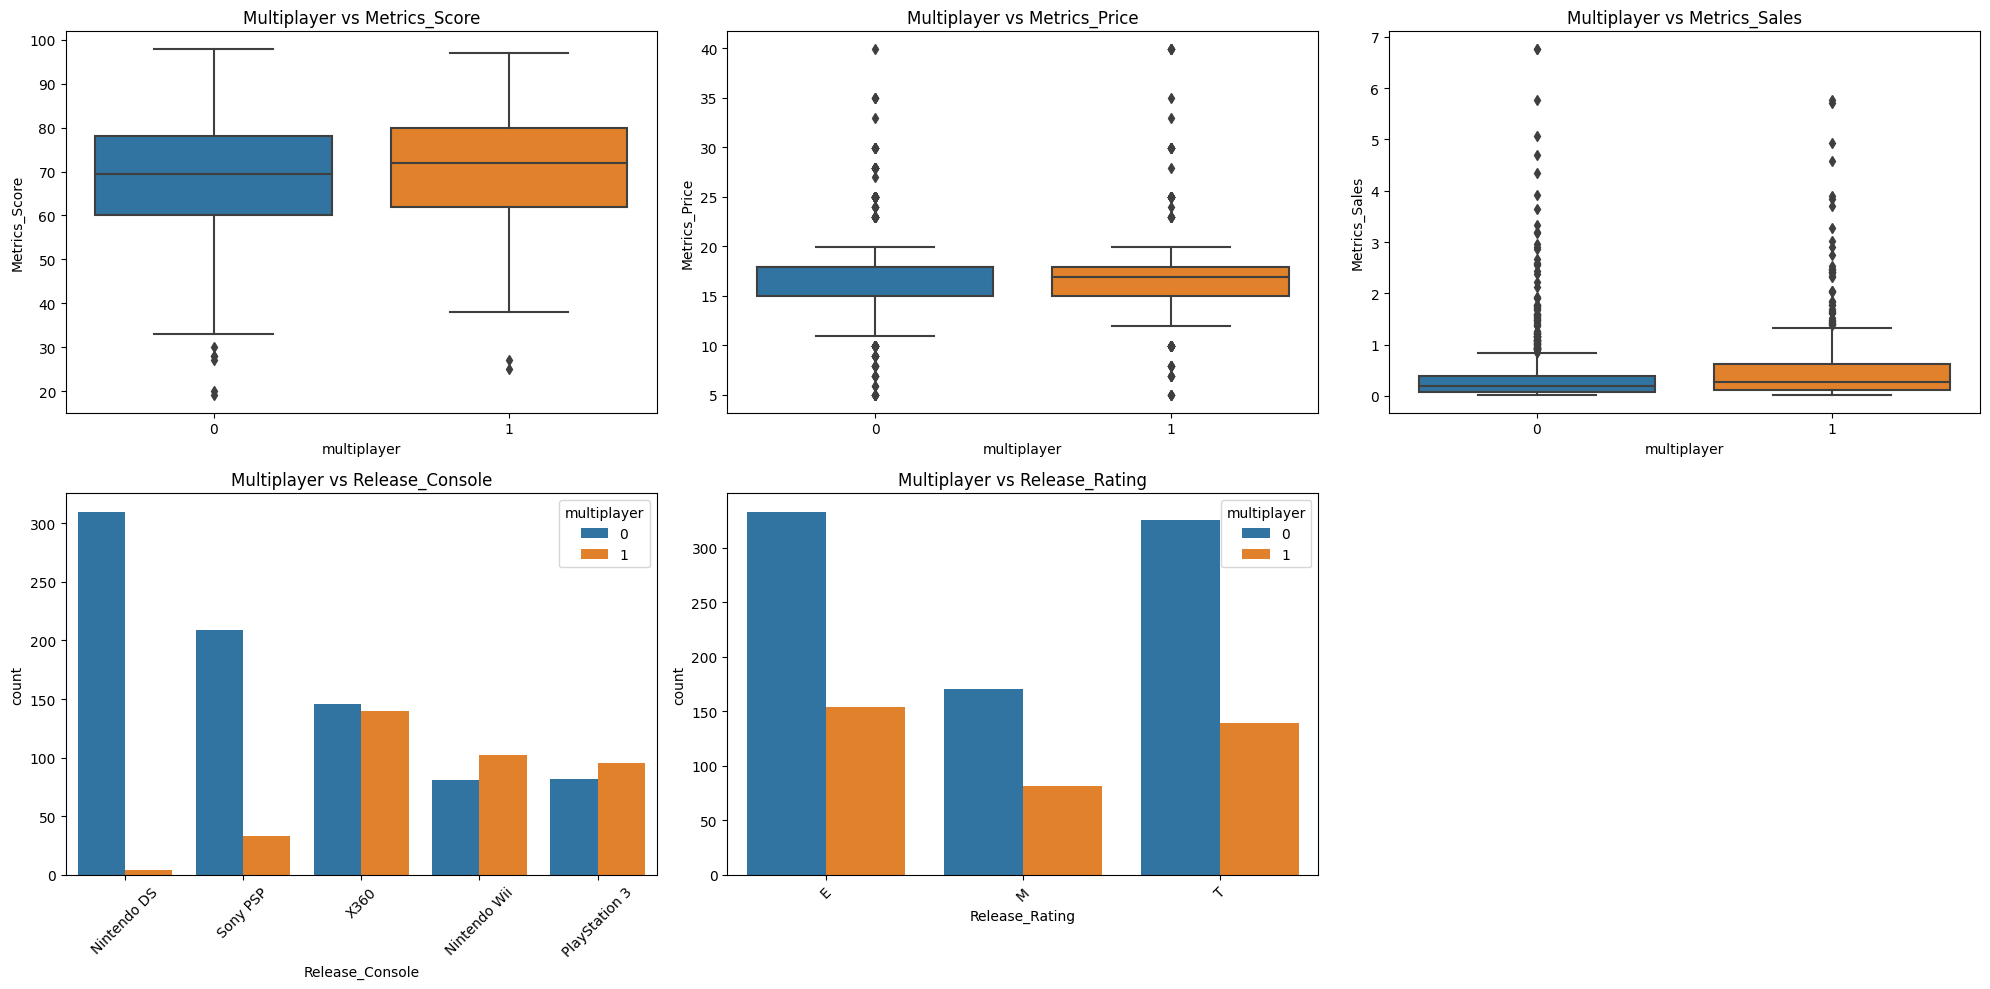

In [18]:
plt.figure(figsize=(20, 10))

numerical_vars = ['Metrics_Score', 'Metrics_Price', 'Metrics_Sales']
categorical_vars = ['Release_Console', 'Release_Rating']

# Numerical variables
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='multiplayer', y=var, data=df)
    plt.title(f'Multiplayer vs {var}')

# Categorical variables
for i, var in enumerate(categorical_vars, 4):
    plt.subplot(2, 3, i)
    sns.countplot(x=var, hue='multiplayer', data=df)
    plt.xticks(rotation=45)
    plt.title(f'Multiplayer vs {var}')

plt.tight_layout()
plt.show()


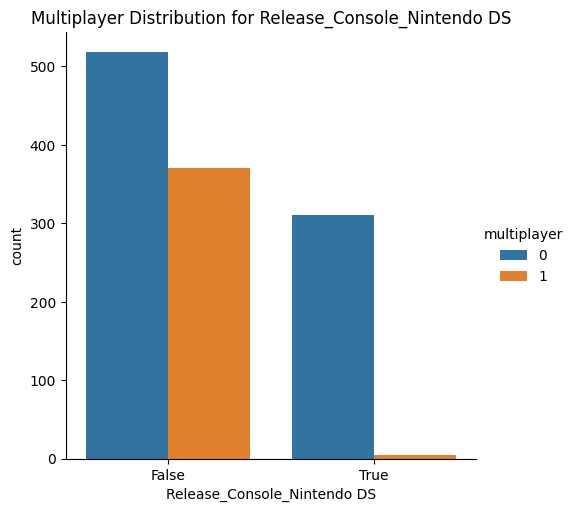

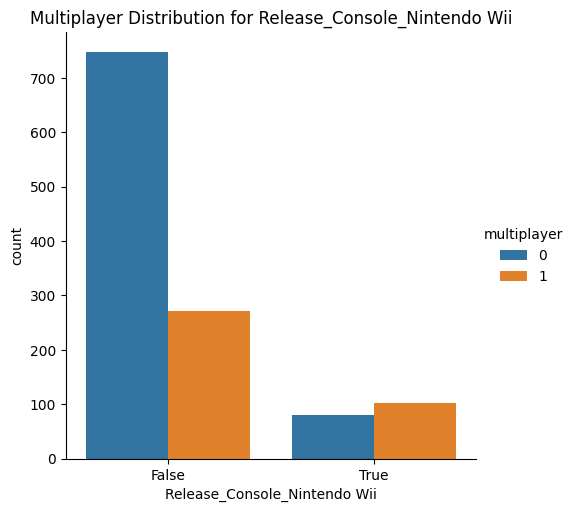

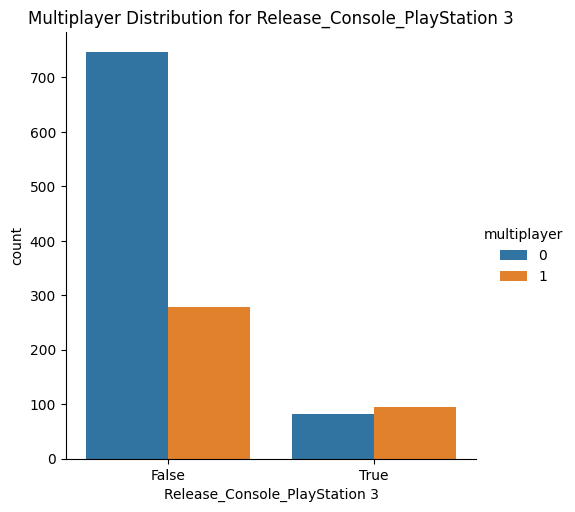

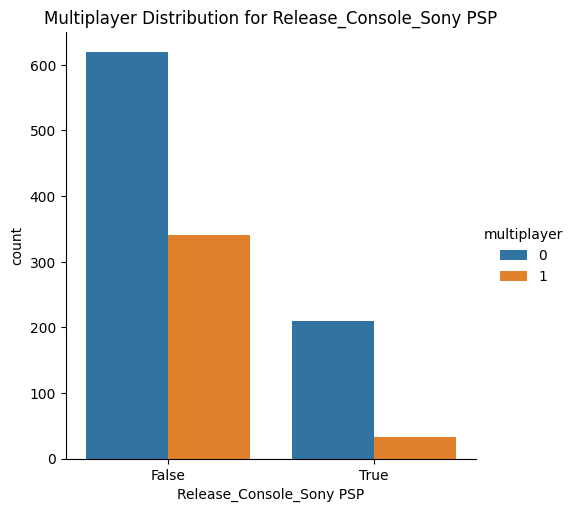

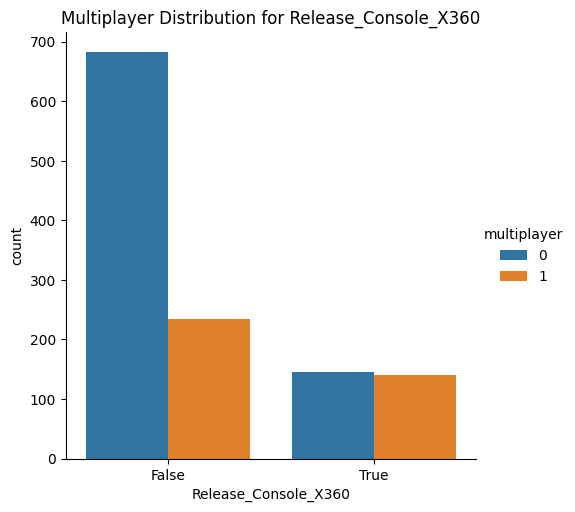

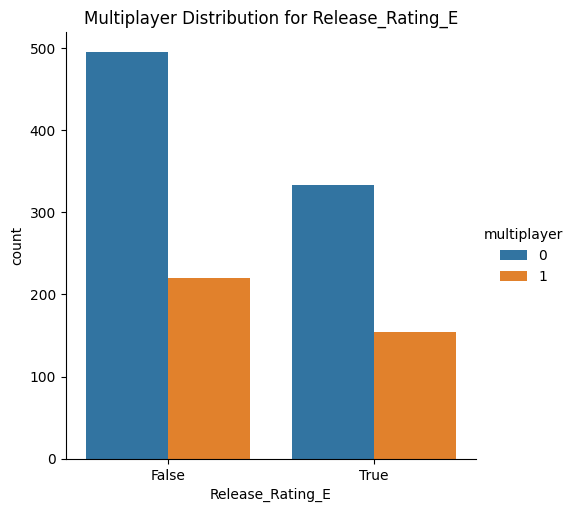

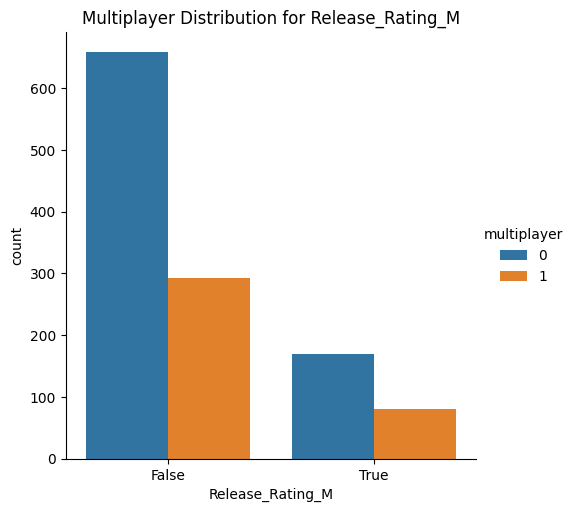

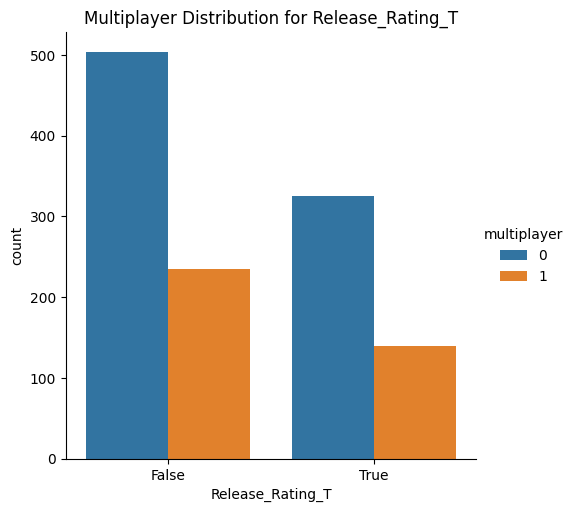

In [19]:
df_encoded = pd.get_dummies(df, columns=["Release_Console", "Release_Rating"])
encoded_categorical_columns = df_encoded.columns[df_encoded.columns.str.startswith("Release_Console") | df_encoded.columns.str.startswith("Release_Rating")]

for column in encoded_categorical_columns:

    sns.catplot(x=column, kind="count", hue="multiplayer", data=df_encoded)

    plt.title(f'Multiplayer Distribution for {column}')

plt.show()

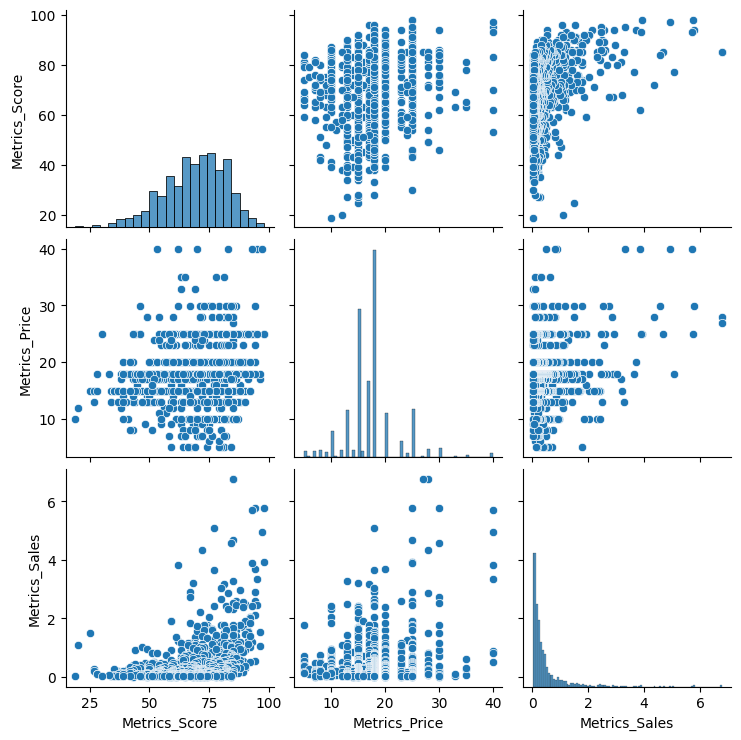

In [20]:
sns.pairplot(df[numerical_vars])
plt.show()


In [21]:
df[numerical_vars].corr()

,Metrics_Score,Metrics_Price,Metrics_Sales
Metrics_Score,1.000000,0.137994,0.366658
Metrics_Price,0.137994,1.000000,0.261044
Metrics_Sales,0.366658,0.261044,1.000000


There does not seem to be a strong presence of multicollinearity since the correlation between two numerical explanatory variables is not 0.7 or greater. It is good there is no multicollinearity so we dont have to work about misinterpretation of slopes. 

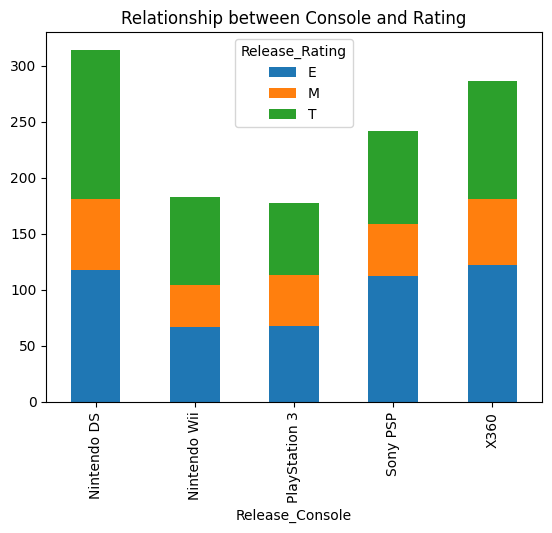

In [22]:
pd.crosstab(df['Release_Console'], df['Release_Rating']).plot(kind='bar', stacked=True)
plt.title('Relationship between Console and Rating')
plt.show()

In [23]:
df_dummy = pd.get_dummies(df, columns=['Release_Console', 'Release_Rating'])
df['Sales_Price_Interaction'] = df['Metrics_Sales'] * df['Metrics_Price']

for console in df_dummy.columns[df_dummy.columns.str.startswith('Release_Console')]:
    df[f'ReviewScore_{console}_Interaction'] = df['Metrics_Score'] * df_dummy[console]


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X = df_encoded.drop(['multiplayer', 'Features_Players'], axis=1)
y = df_encoded['multiplayer']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Check the coefficients
print(model.coef_)


[[-0.03070935  0.21494076  0.00737903 -2.64181665  1.29773716  1.06557274
  -0.55276749  0.82649584 -0.05735437  0.02327411  0.02930186]]


**Interaction Effects**

In [25]:
import warnings
from statsmodels.tools.sm_exceptions import PerfectSeparationWarning
warnings.filterwarnings("ignore", category=PerfectSeparationWarning)
sns.lmplot(x="Metrics_Score", y= "multiplayer", hue="Release_Console", data = df, logistic=True, ci=False)
plt.show()

ImportError: cannot import name 'PerfectSeparationWarning' from 'statsmodels.tools.sm_exceptions' (/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tools/sm_exceptions.py)

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
#logistic model 1 (one different console type)
log_mod1 = smf.logit("multiplayer~Metrics_Score+Release_Console", data = df[df["Release_Console"]== "Nintendo Wii"]).fit()
display(log_mod1.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.678188
         Iterations 4


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-0.9688,0.708,-1.368,0.171,-2.357,0.419
Metrics_Score,0.0186,0.011,1.729,0.084,-0.002,0.040


In [ ]:
#logistic model 1 (another different console type)
log_mod1 = smf.logit("multiplayer~Metrics_Score+Release_Console", data = df[df["Release_Console"]== "Sony PSP"]).fit()
display(log_mod1.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.397611
         Iterations 6


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-2.5239,1.200,-2.104,0.035,-4.875,-0.173
Metrics_Score,0.0097,0.017,0.576,0.565,-0.023,0.043


In [ ]:
#logistic model 1 (another different console type)
log_mod1 = smf.logit("multiplayer~Metrics_Score+Release_Console", data = df[df["Release_Console"]== "Nintendo DS"]).fit()
display(log_mod1.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.055901
         Iterations 10


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-17.5829,6.387,-2.753,0.006,-30.101,-5.065
Metrics_Score,0.1740,0.078,2.227,0.026,0.021,0.327


In [ ]:
#logistic model 1 (another different console type)
log_mod1 = smf.logit("multiplayer~Metrics_Score+Release_Console", data = df[df["Release_Console"]== "X360"]).fit()
display(log_mod1.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.692433
         Iterations 3


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-0.3746,0.637,-0.588,0.557,-1.624,0.874
Metrics_Score,0.0047,0.009,0.531,0.595,-0.013,0.022


In [ ]:
#logistic model 1 (another different console type)
log_mod1 = smf.logit("multiplayer~Metrics_Score+Release_Console", data = df[df["Release_Console"]== "PlayStation 3"]).fit()
display(log_mod1.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.687785
         Iterations 4


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-0.6708,0.858,-0.782,0.434,-2.352,1.010
Metrics_Score,0.0114,0.012,0.968,0.333,-0.012,0.034


For this numerical and categorical explanatory pair, because the Metrics Score slope change semi-drastically depending on what console is, we can conclude there is a notable interaction effect with these two variables on the response variable. The largest slope difference is between console x360 and Nintendo DS with a difference of 0.1693; althought there is not a notable difference for the majority of the consoles, there are still difference between other consoles which cause this interaction effect on the response variable.

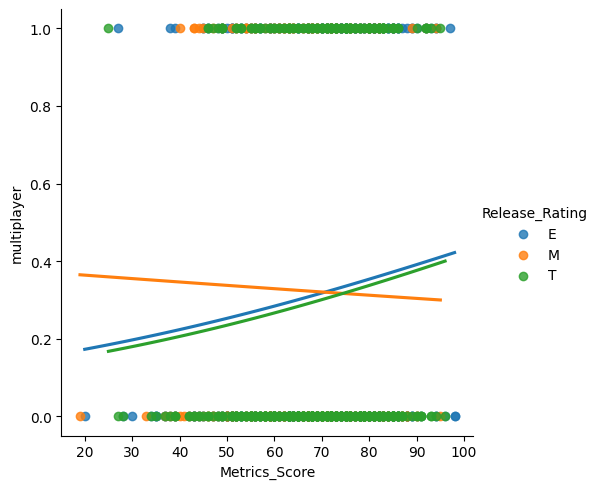

In [ ]:
#basic logistic regression model 1
sns.lmplot(x="Metrics_Score", y= "multiplayer", hue="Release_Rating", data = df, logistic=True, ci=False)
plt.show()

In [ ]:
#logistic model 1 (one different rating type)
log_mod1 = smf.logit("multiplayer~Metrics_Score+Release_Rating", data = df[df["Release_Rating"]== "E"]).fit()
display(log_mod1.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.619260
         Iterations 5


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-1.8894,0.542,-3.487,0.000,-2.951,-0.827
Metrics_Score,0.0161,0.008,2.115,0.034,0.001,0.031


In [ ]:
#logistic model 1 (one different rating type)
log_mod1 = smf.logit("multiplayer~Metrics_Score+Release_Rating", data = df[df["Release_Rating"]== "T"]).fit()
display(log_mod1.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.606074
         Iterations 5


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-2.0272,0.603,-3.362,0.001,-3.209,-0.845
Metrics_Score,0.0169,0.008,1.997,0.046,0.000,0.033


In [ ]:
#logistic model 1 (one different rating type)
log_mod1 = smf.logit("multiplayer~Metrics_Score+Release_Rating", data = df[df["Release_Rating"]== "M"]).fit()
display(log_mod1.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.628621
         Iterations 5


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-0.4819,0.711,-0.678,0.498,-1.875,0.911
Metrics_Score,-0.0039,0.010,-0.371,0.711,-0.024,0.017


For this numerical and categorical explanatory pair, because the Metrics Score slope does not change drastically depending on what rating it is, we can conclude there is not a notable interaction effect with these two variables on the response variable. The largest slope difference is between rating T and rating M with a difference of 0.0208; however, because the difference is not large enought, we can conclude there is no notable interaction terms here. 

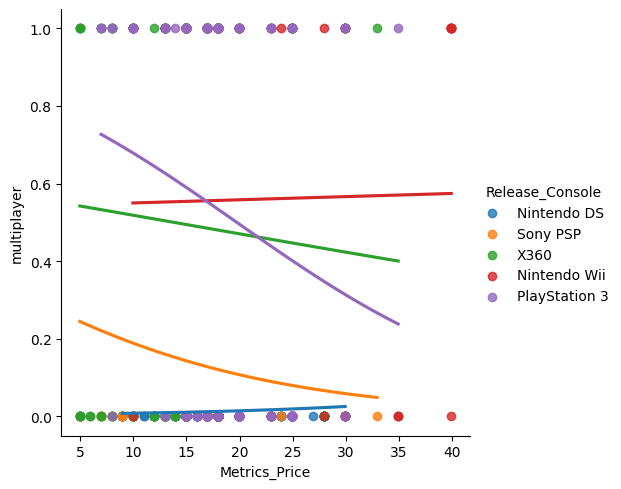

In [ ]:
#basic logistic regression model 2
sns.lmplot(x="Metrics_Price", y= "multiplayer", hue="Release_Console", data = df, logistic=True, ci=False)
plt.show()

In [ ]:
#logistic model 2 (one different console type)
log_mod2 = smf.logit("multiplayer~Metrics_Price+Release_Console", data = df[df["Release_Console"]== "Nintendo Wii"]).fit()
display(log_mod2.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.686503
         Iterations 4


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,0.1670,0.515,0.324,0.746,-0.842,1.176
Metrics_Price,0.0033,0.026,0.129,0.897,-0.047,0.054


In [ ]:
#logistic model 2 (another different console type)
log_mod2 = smf.logit("multiplayer~Metrics_Price+Release_Console", data = df[df["Release_Console"]== "Sony PSP"]).fit()
display(log_mod2.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.394779
         Iterations 6


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-0.8017,0.806,-0.995,0.320,-2.381,0.778
Metrics_Price,-0.0661,0.051,-1.305,0.192,-0.165,0.033


In [ ]:
#logistic model 2 (another different console type)
log_mod2 = smf.logit("multiplayer~Metrics_Price+Release_Console", data = df[df["Release_Console"]== "X360"]).fit()
display(log_mod2.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.691978
         Iterations 4


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,0.2635,0.432,0.610,0.542,-0.583,1.110
Metrics_Price,-0.0191,0.026,-0.735,0.462,-0.070,0.032


In [ ]:
#logistic model 2 (another different console type)
log_mod2 = smf.logit("multiplayer~Metrics_Price+Release_Console", data = df[df["Release_Console"]== "Nintendo DS"]).fit()
display(log_mod2.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.067739
         Iterations 9


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-5.4684,2.076,-2.634,0.008,-9.537,-1.400
Metrics_Price,0.0603,0.105,0.574,0.566,-0.145,0.266


In [ ]:
#logistic model 2 (another different console type)
log_mod2 = smf.logit("multiplayer~Metrics_Price+Release_Console", data = df[df["Release_Console"]== "PlayStation 3"]).fit()
display(log_mod2.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.675404
         Iterations 4


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,1.5108,0.627,2.410,0.016,0.282,2.739
Metrics_Price,-0.0766,0.034,-2.246,0.025,-0.143,-0.010


For this numerical and categorical explanatory pair, because the Metrics Price slope change semi-drastically depending on what console is we can conclude there is a notable interaction effect with these two variables on the response variable. The largest slope difference is between console playstation3 and nintendo ds with a difference of 0.1369. 

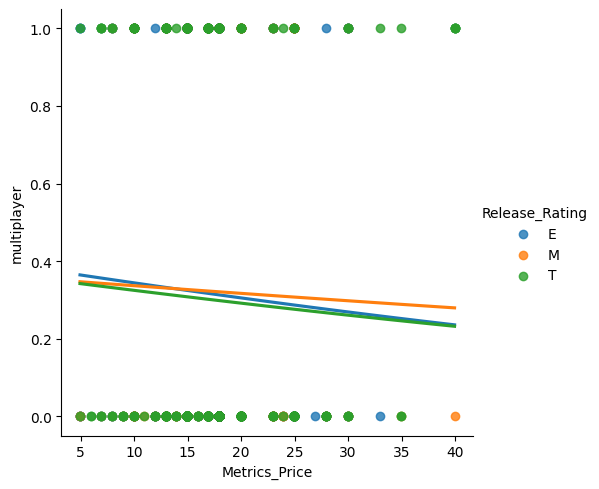

In [ ]:
#basic logistic regression model 2
sns.lmplot(x="Metrics_Price", y= "multiplayer", hue="Release_Rating", data = df, logistic=True, ci=False)
plt.show()

In [ ]:
#logistic model 2 (one different rating type)
log_mod2 = smf.logit("multiplayer~Metrics_Price+Release_Rating", data = df[df["Release_Rating"]== "E"]).fit()
display(log_mod2.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.623289
         Iterations 5


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-0.4688,0.379,-1.237,0.216,-1.212,0.274
Metrics_Price,-0.0177,0.022,-0.822,0.411,-0.060,0.025


In [ ]:
#logistic model 2 (another different rating type)
log_mod2 = smf.logit("multiplayer~Metrics_Price+Release_Rating", data = df[df["Release_Rating"]== "T"]).fit()
display(log_mod2.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.609877
         Iterations 5


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-0.5777,0.373,-1.548,0.122,-1.309,0.154
Metrics_Price,-0.0155,0.021,-0.753,0.452,-0.056,0.025


In [ ]:
#logistic model 2 (another different rating type)
log_mod2 = smf.logit("multiplayer~Metrics_Price+Release_Rating", data = df[df["Release_Rating"]== "M"]).fit()
display(log_mod2.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.628718
         Iterations 5


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-0.5892,0.529,-1.113,0.265,-1.626,0.448
Metrics_Price,-0.0090,0.030,-0.297,0.767,-0.068,0.050


For this numerical and categorical explanatory pair, because the Metrics Price slope does not change drastically depending on what rating it is, we can conclude there is not a notable interaction effect with these two variables on the response variable. All of these interaction term pair slopes remain within the same range of negatives values. 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


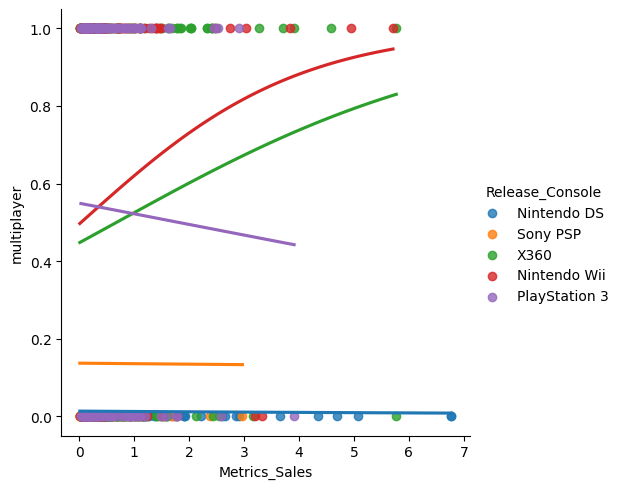

In [ ]:
#basic logistic regression model 3
sns.lmplot(x="Metrics_Sales", y= "multiplayer", hue="Release_Console", data = df, logistic=True, ci=False)
plt.show()

In [ ]:
#logistic model 3 (one different console type)
log_mod3 = smf.logit("multiplayer~Metrics_Sales+Release_Console", data = df[df["Release_Console"]== "Nintendo DS"]).fit()
display(log_mod3.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.068218
         Iterations 9


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-4.3209,0.567,-7.622,0.000,-5.432,-3.210
Metrics_Sales,-0.0740,0.695,-0.106,0.915,-1.437,1.289


In [ ]:
#logistic model 3 (another different console type)
log_mod3 = smf.logit("multiplayer~Metrics_Sales+Release_Console", data = df[df["Release_Console"]== "Sony PSP"]).fit()
display(log_mod3.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.398306
         Iterations 6


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-1.8430,0.230,-8.003,0.000,-2.294,-1.392
Metrics_Sales,-0.0108,0.512,-0.021,0.983,-1.014,0.992


In [ ]:
#logistic model 3 (another different console type)
log_mod3 = smf.logit("multiplayer~Metrics_Sales+Release_Console", data = df[df["Release_Console"]== "X360"]).fit()
display(log_mod3.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.685595
         Iterations 5


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-0.2120,0.146,-1.453,0.146,-0.498,0.074
Metrics_Sales,0.3115,0.161,1.940,0.052,-0.003,0.626


In [ ]:
#logistic model 3 (another different console type)
log_mod3 = smf.logit("multiplayer~Metrics_Sales+Release_Console", data = df[df["Release_Console"]== "Nintendo Wii"]).fit()
display(log_mod3.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.672678
         Iterations 6


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-0.0173,0.189,-0.091,0.927,-0.388,0.353
Metrics_Sales,0.5071,0.259,1.959,0.050,-0.000,1.015


In [ ]:
#logistic model 3 (another different console type)
log_mod3 = smf.logit("multiplayer~Metrics_Sales+Release_Console", data = df[df["Release_Console"]== "PlayStation 3"]).fit()
display(log_mod3.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.689980
         Iterations 3


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,0.1973,0.195,1.012,0.312,-0.185,0.580
Metrics_Sales,-0.1098,0.270,-0.406,0.685,-0.640,0.420


For this numerical and categorical explanatory pair, because the Metrics Sales slope change drastically depending on what console it is, we can conclude there is a notable interaction effect with these two variables on the response variable. The largest slope difference is between console playstation3 and nintendo wii with a difference of 0.6169. This is the largest difference thus far in our interaction pairs. Even though this difference is the largest, overall, the other consoles seem to vary in slopes by a lot too, so metrics sales and release console is a strong interaction term that should be considered in building future models. 

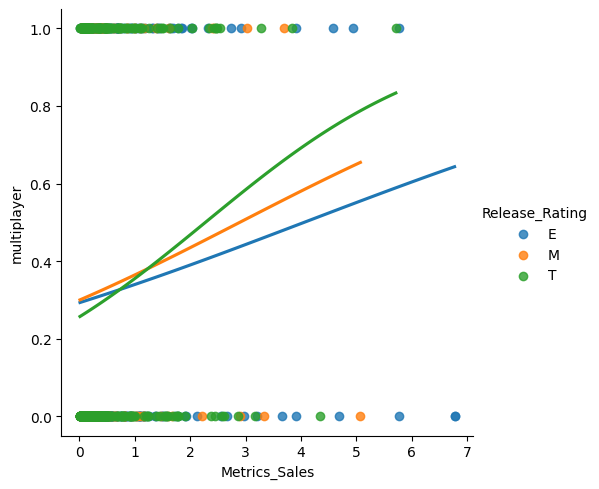

In [ ]:
#basic logistic regression model 3
sns.lmplot(x="Metrics_Sales", y= "multiplayer", hue="Release_Rating", data = df, logistic=True, ci=False)
plt.show()

In [ ]:
#logistic model 3 (one different rating type)
log_mod3 = smf.logit("multiplayer~Metrics_Sales+Release_Rating", data = df[df["Release_Rating"]== "E"]).fit()
display(log_mod3.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.620010
         Iterations 5


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-0.8823,0.114,-7.765,0.000,-1.105,-0.660
Metrics_Sales,0.2174,0.111,1.962,0.050,0.000,0.435


In [ ]:
#logistic model 3 (one different rating type)
log_mod3 = smf.logit("multiplayer~Metrics_Sales+Release_Rating", data = df[df["Release_Rating"]== "T"]).fit()
display(log_mod3.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.600502
         Iterations 5


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-1.0658,0.127,-8.416,0.000,-1.314,-0.818
Metrics_Sales,0.4686,0.158,2.965,0.003,0.159,0.778


In [ ]:
#logistic model 3 (one different rating type)
log_mod3 = smf.logit("multiplayer~Metrics_Sales+Release_Rating", data = df[df["Release_Rating"]== "M"]).fit()
display(log_mod3.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.625112
         Iterations 5


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-0.8502,0.158,-5.390,0.000,-1.159,-0.541
Metrics_Sales,0.2937,0.214,1.374,0.169,-0.125,0.712


For this numerical and categorical explanatory pair, because the Metrics Sales slope change semi-drastically depending on what rating it is, we can conclude there is a notable interaction effect with these two variables on the response variable. The largest difference is between rating T and rating E of 0.2512. 

**Further Analysis**

The preliminary analysis has shed light on several fascinating aspects of the video game market. Our exploration revealed key insights into how different factors correlate with a game's multiplayer feature. The logistic regression model, augmented with interaction terms, provided a nuanced understanding of these relationships. Notably, the model's coefficients pointed towards significant influences from certain variables, indicating their relevance in predicting a game's multiplayer status.

One of the striking findings was the impact of review scores and sales on multiplayer likelihood, nuanced further by the interaction with game prices and console types. This suggests a complex and multifaceted decision-making process behind a game's development and marketing strategy, possibly reflecting the evolving consumer preferences and technological advancements in the gaming industry.

**Which explanatory variables have strong relationships with the response variable?** 

Individually, the categorical explanatory variable Console and Rating had the strongest relationship and association with the response variable Multiplayer. In the histograms, we see that the boxes vary in height, indicating that the specific Console and Rating plays a role if a game is multiplayer or not. 

**Which explanatory variables have weak relationships with the response variable?**

Individually, the Score, Price, and Sale numerical explanatory variables had the weakest relationships with the response variable Multiplayer. In the box plots, we see that most of the boxes overlap with each other, indicating that regardless of how one scores the video game, pays for the game, or how much it sold, does not have much impact if the game is multiplayer or not. This could potentially weaken our end results. 

These preliminary findings set the stage for deeper analysis and model refinement. As we move forward, we will leverage these insights to build more sophisticated predictive models, aiming to offer actionable intelligence for game developers, marketers, and enthusiasts alike.

## 5. Model Data Preprocessing

#### Features Matrix and Target Array Preparation
We extracted the relevant columns to form the features matrix `X`, encompassing 'review score', 'sales', 'price', 'console', and 'rating'. The target array `y` was created from the binary 'multiplayer' variable, indicating whether a game supports multiplayer mode.

#### Explanatory Variable Scaling
The numerical explanatory variables were standardized using scaling techniques to ensure that each feature contributes equally to the regression analysis. This normalization is particularly important for distance-based models such as logistic regression.

#### Indicator Variables
Categorical explanatory variables were transformed into indicator (dummy) variables. This is necessary for logistic regression, as it can only interpret numerical input. The transformation was done while preserving all categories of the original variables, even if they do not appear in the dataset.

#### Data Transformation Pipeline
A data transformation pipeline was constructed and applied to the features matrix, encapsulating both the scaling of numerical variables and the encoding of categorical variables. The resulting transformed dataset is now ready for model training and evaluation.


In [ ]:
features_columns = ['Metrics_Score', 'Metrics_Price', 'Metrics_Sales', 'Release_Console', 'Release_Rating']
X = df[features_columns]
y = df['multiplayer']
X.head()


,Metrics_Score,Metrics_Price,Metrics_Sales,Release_Console,Release_Rating
0,85,24.95,4.69,Nintendo DS,E
1,89,14.95,0.56,Sony PSP,E
2,81,22.95,0.54,Nintendo DS,E
3,81,12.95,0.49,Sony PSP,E
4,61,14.95,0.45,Nintendo DS,E


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_cols = ['Metrics_Score', 'Metrics_Price', 'Metrics_Sales']
cat_cols = ['Release_Console', 'Release_Rating']

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
X_transformed = pipeline.fit_transform(X)

print(X_transformed.shape)

(1202, 11)


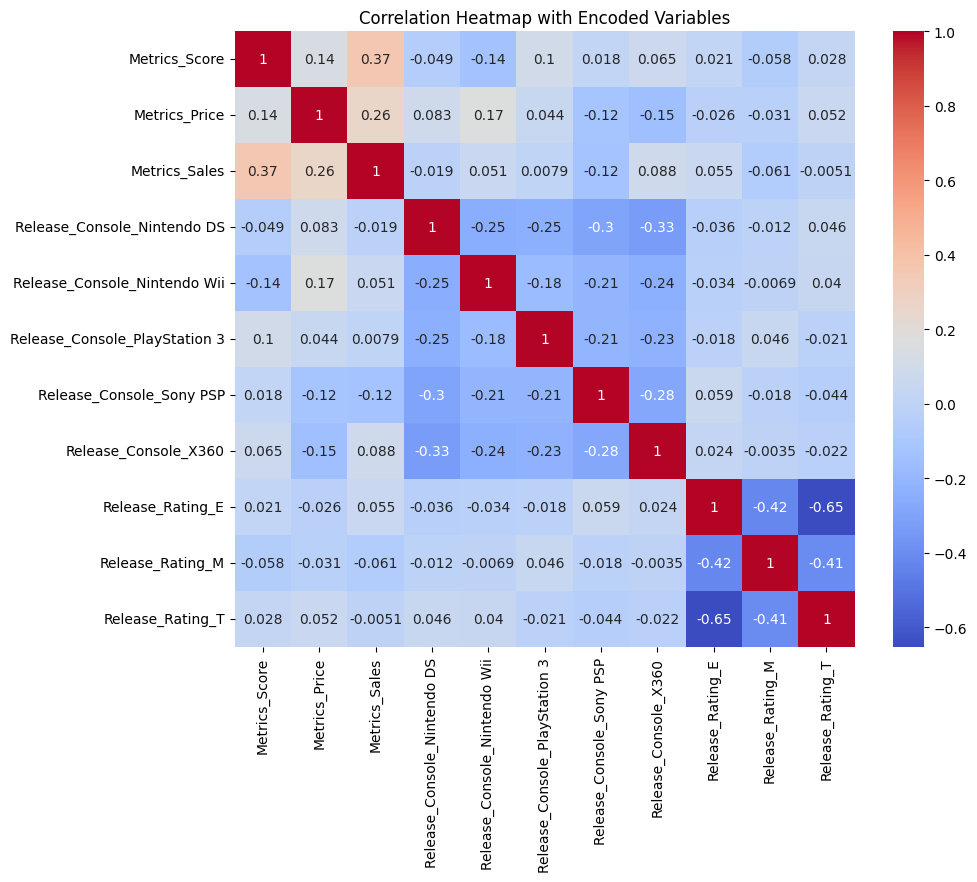

In [ ]:
X_encoded = pd.get_dummies(X)

corr_matrix = X_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap with Encoded Variables')
plt.show()


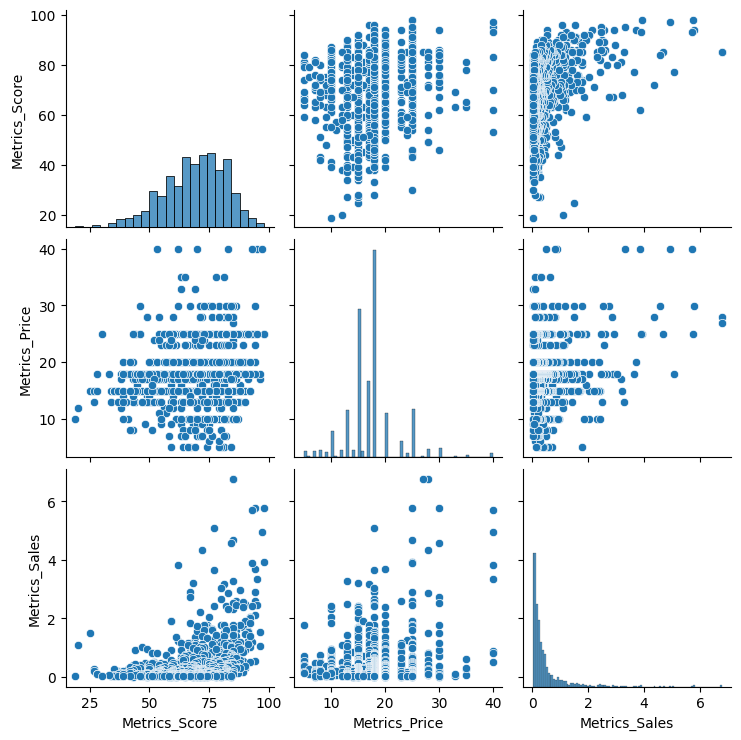

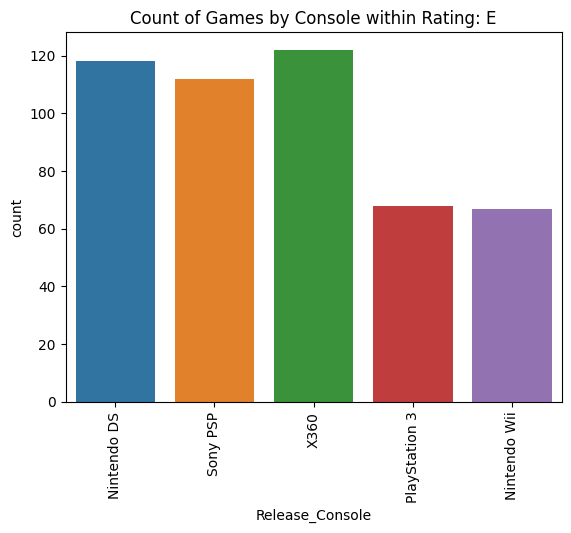

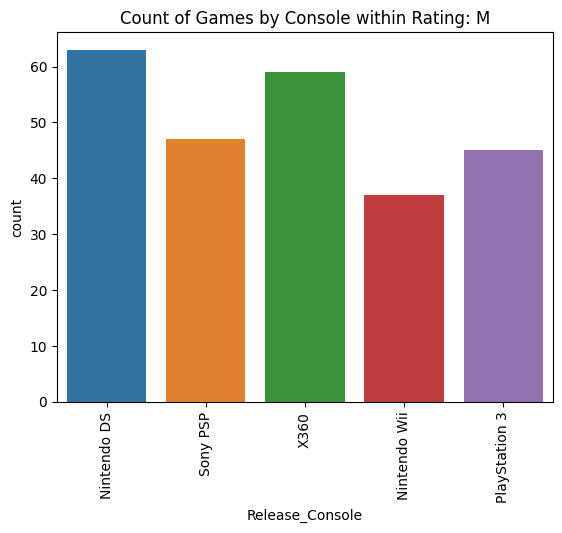

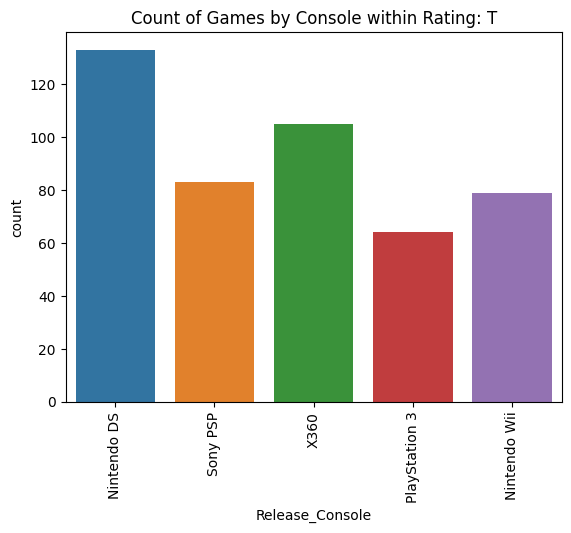

In [ ]:
import itertools
numerical_data = df[num_cols]
sns.pairplot(numerical_data)

plt.show()

for rating in df['Release_Rating'].unique():

    subset = df[df['Release_Rating'] == rating]

    sns.countplot(x='Release_Console', data=subset)

    plt.title(f'Count of Games by Console within Rating: {rating}')

    plt.xticks(rotation=90)

    plt.show()


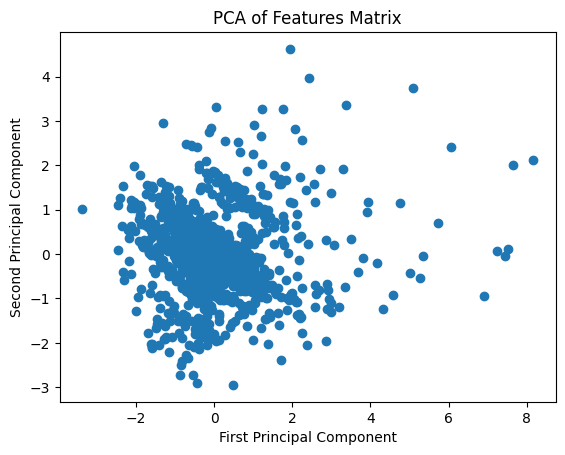

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_transformed)  

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Features Matrix')
plt.show()


## 6. Feature Selection with k-Fold Cross-Validation

We used the LASSO Logistic Regression Model to do feature selection and k-fold cross validation since we’re the most familiar with it, and therefore are the most confident in getting better results and fewer mistakes or errors. In addition, it’s also the simplest model to understand, since explanatory variables that are overfitting the model or not providing enough predictive power are zeroed out; this allows us to focus on the variables that are actually contributing to the highest AUC score.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold


In [ ]:
alpha_values = np.arange(0, 0.505, 0.005)
C_values = 1 / alpha_values
C_values[0] = 1e5
# Placeholder for AUC scores // empty list to store the results of the cross validation
results = []

# K-Fold Cross-Validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for C in C_values:
    # Define the logistic regression model with L1 regularization
    model = LogisticRegression(penalty='l1', C=C, solver='saga', max_iter=1000)

    # Calculate average AUC over k-fold cross-validation
    auc_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc')
    avg_auc = auc_scores.mean()
    std_auc = auc_scores.std()

    # Store the results
    results.append({'Lambda': 1/C, 'Test_Fold_AUC avg': avg_auc, 'Test_Fold_AUC std': std_auc})

df_results = pd.DataFrame(results, columns=['Lambda', 'Test_Fold_AUC avg', 'Test_Fold_AUC std'])

/var/folders/d8/qgb_8zcs7vl6pjzppspg_0sw0000gn/T/ipykernel_90934/1229611018.py:3: RuntimeWarning: divide by zero encountered in divide
  C_values = 1 / alpha_values
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

In [ ]:
print(df_results)

      Lambda  Test_Fold_AUC avg  Test_Fold_AUC std
0    0.00001           0.772537           0.024765
1    0.00500           0.772537           0.024765
2    0.01000           0.772505           0.024718
3    0.01500           0.772505           0.024718
4    0.02000           0.772537           0.024765
..       ...                ...                ...
96   0.48000           0.772387           0.025345
97   0.48500           0.772426           0.025371
98   0.49000           0.772356           0.025383
99   0.49500           0.772394           0.025409
100  0.50000           0.772356           0.025383

[101 rows x 3 columns]


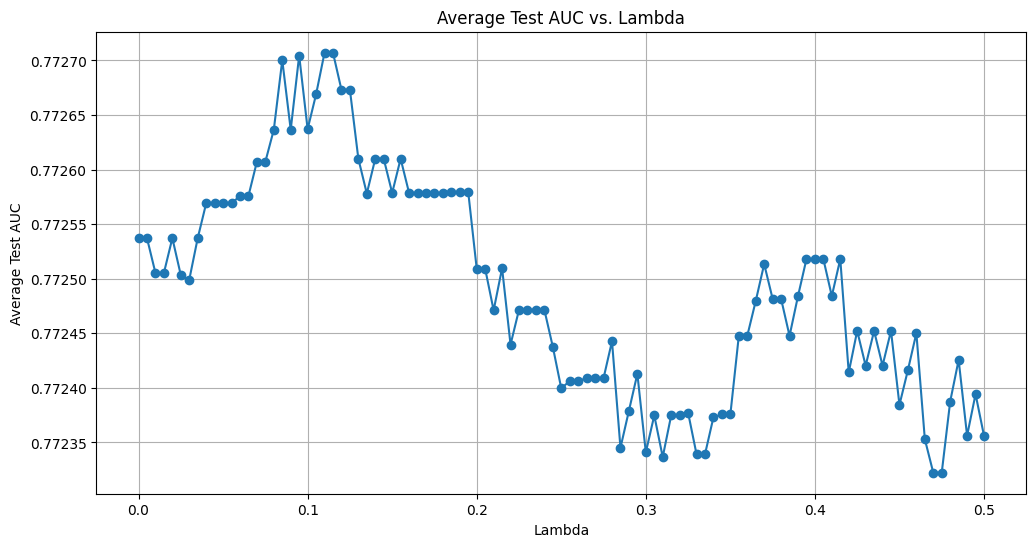

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_results['Lambda'], df_results['Test_Fold_AUC avg'], marker='o')
plt.xlabel('Lambda')
plt.ylabel('Average Test AUC')
plt.title('Average Test AUC vs. Lambda')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegressionCV

model_cv = LogisticRegressionCV(Cs=C_values, cv=5, penalty='l1', solver='saga', scoring='roc_auc', max_iter=10000)
model_cv.fit(X_train, y_train)

best_C = model_cv.C_[0]
best_lambda = 1 / best_C

print(f"The best model was found at lambda: {best_lambda}")
print(f"This model had the highest average cross-validated AUC of: {max(model_cv.scores_[1].mean(axis=0))}")

best_model = LogisticRegression(penalty='l1', C=best_C, solver='saga', max_iter=10000)
best_model.fit(X_train, y_train)


The best model was found at lambda: 0.025
This model had the highest average cross-validated AUC of: 0.7706992981170447


LogisticRegression(C=40.0, max_iter=10000, penalty='l1', solver='saga')

## 7. Best Model Discussion

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l1', solver='saga', max_iter=1000)

model.fit(X_train, y_train)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: [-0.48059247]
Coefficients: [[-3.83907088e-02  2.52543285e-01  2.19408953e-03 -2.46388737e+00
   1.07722031e+00  8.69865928e-01 -7.42463738e-01  5.97439775e-01
  -8.45109601e-02  0.00000000e+00  0.00000000e+00]]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
from sklearn.linear_model import LogisticRegressionCV

# Assuming you're using LogisticRegressionCV, which automatically handles cross-validation
model_cv = LogisticRegressionCV(penalty='l1', solver='saga', max_iter=1000, cv=5)
model_cv.fit(X_train, y_train)

# Access the intercept and coefficients from the model with the best C value
print("Intercept:", model_cv.intercept_)
print("Coefficients:", model_cv.coef_)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma

Intercept: [-0.83482674]
Coefficients: [[-0.03164484  0.21617177  0.00753253 -3.18620225  0.98414154  0.74225565
  -0.93613468  0.4923213  -0.06326541  0.01598748  0.02176433]]


Predicted Probability of Multiplayer Feature:

The logistic regression equation for the predicted probability ($\hat{P}$) of a game featuring multiplayer mode is given by:

\begin{align*}
\hat{P}(\text{multiplayer}=1) = & \; -0.83516024 \\
& - 0.03165411 \times \text{Metrics\_Score} \\
& + 0.2161977 \times \text{Metrics\_Price} \\
& + 0.00753684 \times \text{Metrics\_Sales} \\
& - 3.18629505 \times \text{Release\_Console\_Nintendo\_DS} \\
& + 0.98468484 \times \text{Release\_Console\_Nintendo\_Wii} \\
& + 0.74241625 \times \text{Release\_Console\_PlayStation3} \\
& - 0.93739455 \times \text{Release\_Console\_Sony\_PSP} \\
& + 0.49274786 \times \text{Release\_Console\_X360} \\
& - 0.06268975 \times \text{Release\_Rating\_E} \\
& + 0.01506553 \times \text{Release\_Rating\_M} \\
& + 0.0218352 \times \text{Release\_Rating\_T}
\end{align*}

This equation represents the log-odds of a game supporting multiplayer functionality, which can be converted to a probability via the logistic function.

**Slope Interpretations**

Yes we are able to interpret the slopes from our analysis since we scaled the explanatory variables-- we can use slope magnitudes as a way to value them and compare how powerful they are to the model. One thing that sticks out is the -3.186 to the DS when no other variable has a strength of over 1. Going back to the barplots in #4, we can see why it has that magnitude. DS has almost zero multiplayer games (as opposed to the rest of them with between 20 and 50 percent) so it’s slope magnitude needs to be able to cancel out any positive variable, such as price or sales.

After LASSO regulatization, we can conclude that Release Console DS has the most predictive power in predicting if a video game is multiplayer or not because it has the largest slope magnitude after LASSO regulatization. 

**Multicollinearity**

We assessed multicollinearity, which can impact coefficient estimates and model interpretability, using a correlation matrix and Variance Inflation Factor (VIF) calculations. The correlation matrix revealed no pair of variables with a correlation above the 0.7 threshold, indicating low inter-variable dependence. VIF values for all predictors were under the conservative threshold of 5, suggesting insignificant multicollinearity. This confirms the reliability of our logistic regression coefficients and the model’s predictive stability. Hence, we proceed with our analysis, assured of the interpretability and validity of our model’s predictors.

In [ ]:
X_train.corr()

,Metrics_Price,Metrics_Sales,Metrics_Score,Release_Console_Nintendo DS,Release_Console_Nintendo Wii,Release_Console_PlayStation 3,Release_Console_Sony PSP,Release_Console_X360,Release_Rating_E,Release_Rating_M,Release_Rating_T
Metrics_Price,1.000000,0.264900,0.134903,0.056755,0.197529,0.054496,-0.124755,-0.163609,-0.055652,-0.002851,0.058366
Metrics_Sales,0.264900,1.000000,0.364979,-0.028613,0.054308,0.026206,-0.102173,0.054952,0.015279,-0.063354,0.037749
Metrics_Score,0.134903,0.364979,1.000000,-0.043904,-0.144999,0.108128,0.054386,0.029858,0.006736,-0.056375,0.040490
Release_Console_Nintendo DS,0.056755,-0.028613,-0.043904,1.000000,-0.259460,-0.246227,-0.284271,-0.312839,-0.001959,-0.000160,0.002105
Release_Console_Nintendo Wii,0.197529,0.054308,-0.144999,-0.259460,1.000000,-0.194423,-0.224462,-0.247020,-0.047164,-0.002064,0.049169
Release_Console_PlayStation 3,0.054496,0.026206,0.108128,-0.246227,-0.194423,1.000000,-0.213014,-0.234422,-0.030066,0.066413,-0.025440
Release_Console_Sony PSP,-0.124755,-0.102173,0.054386,-0.284271,-0.224462,-0.213014,1.000000,-0.270641,0.069994,-0.052177,-0.026656
Release_Console_X360,-0.163609,0.054952,0.029858,-0.312839,-0.247020,-0.234422,-0.270641,1.000000,0.003822,-0.005877,0.001083
Release_Rating_E,-0.055652,0.015279,0.006736,-0.001959,-0.047164,-0.030066,0.069994,0.003822,1.000000,-0.423695,-0.650586
Release_Rating_M,-0.002851,-0.063354,-0.056375,-0.000160,-0.002064,0.066413,-0.052177,-0.005877,-0.423695,1.000000,-0.412248


In [ ]:
from statsmodels.tools.tools import add_constant

X_with_const = add_constant(X_encoded)

X_with_const = X_with_const.apply(pd.to_numeric, errors='coerce')

X_with_const = X_with_const.select_dtypes(include=[np.number]).dropna(axis=1)

X_with_const = X_with_const.replace([np.inf, -np.inf], np.nan)

X_with_const = X_with_const.dropna(axis=1)



In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools import add_constant

# Add a constant term to the features matrix for VIF calculation
X_with_const = add_constant(X_with_const)

# Calculate VIF for each feature
vif_data = pd.DataFrame({
    'VIF': [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])],
    'Feature': X_with_const.columns
})

print(vif_data)



         VIF        Feature
0  42.589041          const
1   1.157885  Metrics_Score
2   1.075511  Metrics_Price
3   1.218896  Metrics_Sales


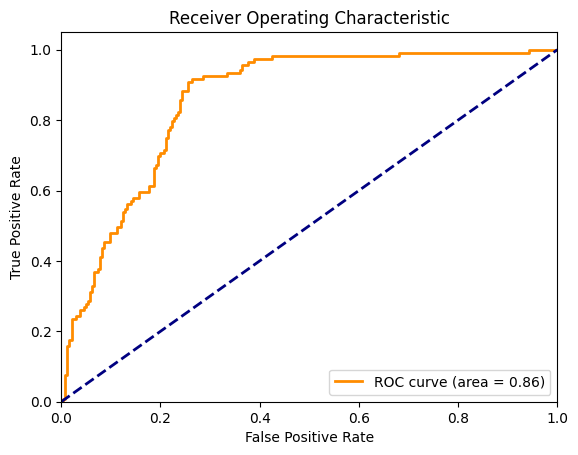

In [ ]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_pred_prob = model.predict_proba(X_test)[:,1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Find the optimal threshold index
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_fpr = fpr[optimal_idx]
optimal_tpr = tpr[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold}")
print(f"True Positive Rate at Optimal Threshold: {optimal_tpr}")
print(f"False Positive Rate at Optimal Threshold: {optimal_fpr}")


Optimal Threshold: 0.3727077332264436
True Positive Rate at Optimal Threshold: 0.9159663865546218
False Positive Rate at Optimal Threshold: 0.2644628099173554


***Best Predictive Probability Threshold***

To align our model with the practical needs of game developers and marketers, we identified an optimal predictive probability threshold. This threshold balances the trade-off between sensitivity (TPR) and specificity (FPR), which is crucial for applications where the cost of false positives is different from the cost of false negatives.

Our ROC curve analysis yielded an optimal threshold of approximately 0.3727. At this threshold, the model achieves a True Positive Rate of about 91.60%, indicating that it correctly identifies multiplayer games most of the time. Meanwhile, the False Positive Rate stands at about 26.45%, which reflects the proportion of single-player games that are misclassified as multiplayer.

In the context of our research, a high TPR is favorable as it ensures that most multiplayer games, which are of particular interest to our stakeholders, are accurately identified. Although the FPR is not negligible, it is a tolerable compromise to capture a significant majority of multiplayer games. For game developers and marketers focusing on maximizing the reach within the multiplayer segment, this threshold ensures that potential opportunities are not missed due to under-prediction.

## 8. Additional Analysis/Insight

In addition to our primary analysis, we conducted k-means clustering to uncover intrinsic groupings within the video game dataset. By applying this unsupervised learning technique, we identified five distinct clusters that suggest segmentation in the gaming market. The Elbow Method revealed an optimal k-value, signifying a natural partition of the data into categories with shared characteristics. This division could reflect varying player preferences, genres, or other underlying trends.

The distribution of clusters presents a compelling narrative: certain clusters are more populated, possibly indicating mainstream gaming trends, while others are sparser, perhaps representing niche markets or emerging genres. This additional insight aligns with our research goal to tailor game features to specific segments, potentially informing targeted development strategies to enhance player engagement in multiplayer environments.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

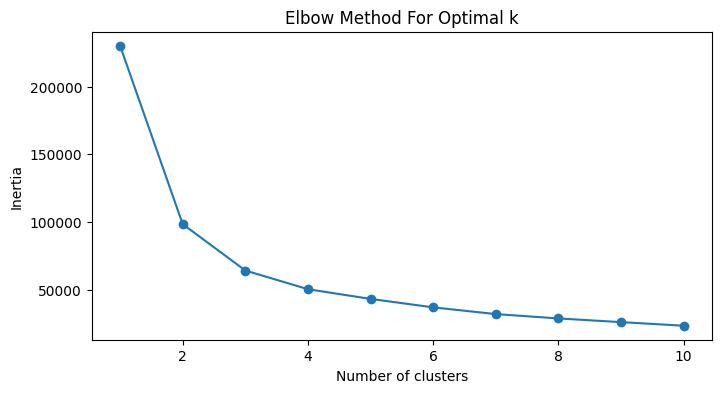

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


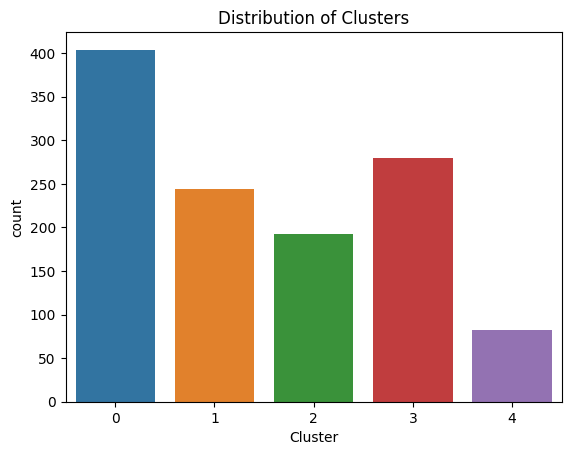

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_encoded)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Fit k-means with the optimal number of clusters
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_encoded)

df['Cluster'] = clusters
sns.countplot(x='Cluster', data=df)
plt.title('Distribution of Clusters')
plt.show()


## 9. Conclusion

Our investigation using the L1 regularization logistic regression model demonstrates an admirable AUC of 0.86. This metric attests to the model's proficiency in distinguishing games likely to feature multiplayer options. We recommend this model to industry stakeholders for its predictive strength, which could significantly inform strategic decision-making.

However, the analysis acknowledges the potential for more extensive exploration. The journey to the best model was constrained by the scope of techniques applied; future analyses could embrace a wider range, including ensemble models or deep learning, to potentially find higher AUCs.

The VIF scores indicate minimal multicollinearity, suggesting that the remaining explanatory variables each play a distinct role in prediction. The optimal threshold derived from the ROC curve, set at approximately 0.3727, balances sensitivity and specificity in predicting multiplayer status.

In light of the model's robust performance and our comprehensive analytical approach, we believe it offers valuable predictive insights. Nonetheless, we recognize that no model is error-free. We anticipate that future ork may refine our approach, perhaps integrating real-time data and exploring temporal dynamics, to maintain relevance in the fast-paced gaming industry.


**Short Comings ans Future Work**

One idea for future work is using a dataset with videogames from more recent years. This dataset only contained video games made from 2004-2008. To create more useful data for present day, we ideal should use video games created in the past couple years since technology is always changing rapidly. More to think about it, as we move into a world with more online multiplayer games, how does that affect the data? There are so many more genres and games now then 15 years ago. What about PC games? Those aren’t mentioned here but are just as popular now as console games. There is more to consider for future work, however becayse this dataset was older, it was lacking current trends. 


## References

Clement, J. (2023). Average sales price (ASP) of video game software at year of release as of August 2022, by platform. Statista. https://www-statista-com.proxy2.library.illinois.edu/statistics/1388073/average-price-of-video-games-by-platform/#statisticContainer.

Severin, K. (2022). Single player vs. multiplayer: A generational changing of the guards or a bifurcation of gamer behaviours?. MIDiA Research. https://www.midiaresearch.com/blog/single-player-vs-multiplayer-a-generational-changing-of-the-guards-or-a-bifurcation-of-gamer-behaviours#:~:text=For%20consumers%2C%20it%20provides%20an,than%20single%20player%20preferring%20gamers.  
